<Figure size 1000x500 with 0 Axes>

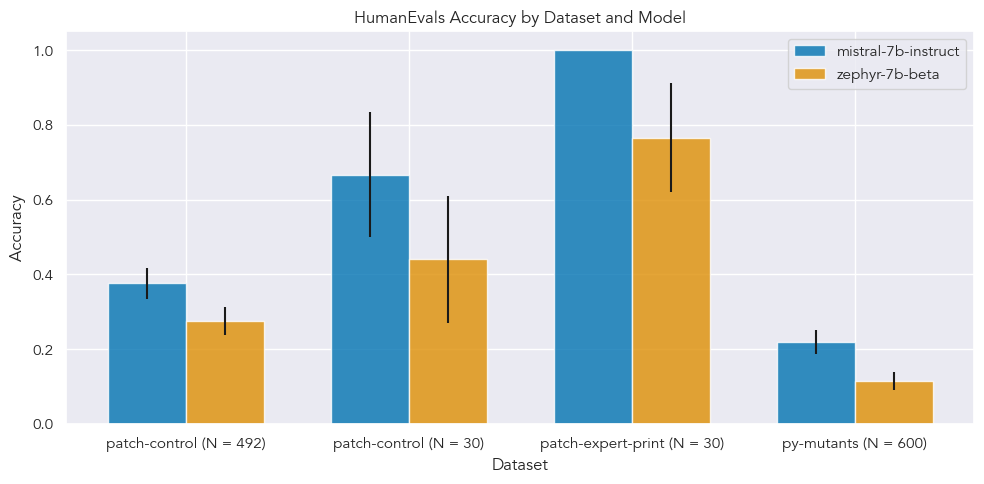

In [21]:
import json
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    try:
        with open(file_path, "r") as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return []

# File paths
file_paths = [
    "metrics/humaneval-patch-control-010224/mistral-7b-instruct-v02-hf/seed1.json",
    "metrics/humaneval-patch-control-010224/huggingfaceh4-zephyr-7b-beta-hf/seed1.json",
    # "metrics/humaneval-patch-control-010224/mistral-7b-instruct-v02-hf/seed1.json",
    # "metrics/humaneval-patch-control-010224/huggingfaceh4-zephyr-7b-beta-hf/seed1.json",
    "metrics/humaneval-patch-manualprint-010124/mistral-7b-instruct-v02-hf/seed1.json",
    "metrics/humaneval-patch-manualprint-010124/huggingfaceh4-zephyr-7b-beta-hf/seed1.json",
    "metrics/humaneval-py-mutants/mistral-7b-instruct-v02-hf/seed1.json",
    "metrics/humaneval-py-mutants/huggingfaceh4-zephyr-7b-beta-hf/seed1.json"
]

# Loading data
datasets = [load_data(path) for path in file_paths]
# datasets[2] = datasets[2][0:30]
# datasets[3] = datasets[3][0:30]

# Setting the theme and font
sns.set_theme(style="darkgrid")
plt.rcParams['font.family'] = 'Avenir'
plt.figure(figsize=(10, 5))
colors = sns.palettes.color_palette("colorblind", 10)

# Calculate means and standard errors using list comprehensions
means = [np.mean(dataset) for dataset in datasets]
std_errs = [1.95 * (np.std(dataset) / np.sqrt(len(dataset))) for dataset in datasets]


# Dataset names
dataset_names = ['patch-control (N = 492)', 'patch-control (N = 30)', 'patch-expert-print (N = 30)', 'py-mutants (N = 600)']

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
opacity = 0.8

# Bar positions
bar_pos_mistral = np.arange(len(dataset_names))
bar_pos_zephyr = [x + bar_width for x in bar_pos_mistral]

# Bars for Mistral
ax.bar(bar_pos_mistral, means[0::2], bar_width, alpha=opacity, color=colors[0], yerr=std_errs[0::2], label='mistral-7b-instruct')

# Bars for Zephyr
ax.bar(bar_pos_zephyr, means[1::2], bar_width, alpha=opacity, color=colors[1], yerr=std_errs[1::2], label='zephyr-7b-beta')

# Labels, Title and Custom x-axis
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('HumanEvals Accuracy by Dataset and Model')
ax.set_xticks([r + bar_width / 2 for r in range(len(dataset_names))])
ax.set_xticklabels(dataset_names)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()
    